# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'D:\University Data\8 semester\Lab Machine learning\lab12\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'D:\University Data\8 semester\Lab Machine learning\archive1\Computer vision\train'
validation_dir = r'D:\University Data\8 semester\Lab Machine learning\archive1\Computer vision\validation'
test_dir = r'D:\University Data\8 semester\Lab Machine learning\archive1\Computer vision\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)



In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=32,class_mode='binary')

Found 240 images belonging to 2 classes.
Found 93 images belonging to 2 classes.


In [8]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [9]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20,
                    callbacks=callbacks)

Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.7009 - acc: 0.4375 
Epoch 1: val_loss improved from inf to 0.69853, saving model to D:\University Data\8 semester\Lab Machine learning\lab12\E1-cp-0001-loss0.70.h5
7/7 [==============================] - 13s 1s/step - loss: 0.7009 - acc: 0.4375 - val_loss: 0.6985 - val_acc: 0.3226
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.6937 - acc: 0.4760
Epoch 2: val_loss did not improve from 0.69853
7/7 [==============================] - 2s 326ms/step - loss: 0.6937 - acc: 0.4760 - val_loss: 0.7030 - val_acc: 0.3226
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 0.6897 - acc: 0.5385
Epoch 3: val_loss did not improve from 0.69853
7/7 [==============================] - 2s 303ms/step - loss: 0.6897 - acc: 0.5385 - val_loss: 0.7232 - val_acc: 0.3226
Epoch 4/20
7/7 [==============================] - ETA: 0s - loss: 0.6915 - acc: 0.5000
Epoch 4: val_loss improved from 0.69853 to 0.69230, saving

In [10]:
model_history.history

{'loss': [0.7009385824203491,
  0.6937475800514221,
  0.6896699070930481,
  0.6915457844734192,
  0.6825234293937683,
  0.6806992292404175,
  0.6797135472297668,
  0.6710573434829712,
  0.6767601370811462,
  0.6544225215911865,
  0.6395209431648254,
  0.627536416053772,
  0.6292269825935364,
  0.6096845269203186,
  0.5985059142112732,
  0.6307424902915955,
  0.6000708937644958,
  0.5635753870010376,
  0.5700387358665466,
  0.5504647493362427],
 'acc': [0.4375,
  0.4759615361690521,
  0.5384615659713745,
  0.5,
  0.6919642686843872,
  0.5480769276618958,
  0.5817307829856873,
  0.5913461446762085,
  0.6009615659713745,
  0.6490384340286255,
  0.7115384340286255,
  0.6473214030265808,
  0.6538461446762085,
  0.6971153616905212,
  0.6634615659713745,
  0.6346153616905212,
  0.6875,
  0.7259615659713745,
  0.6964285969734192,
  0.7355769276618958],
 'val_loss': [0.6985344290733337,
  0.7029623985290527,
  0.7231976985931396,
  0.692298412322998,
  0.711283802986145,
  0.7015873193740845,
 

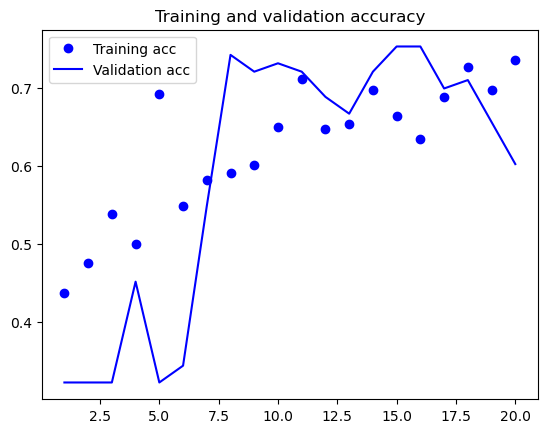

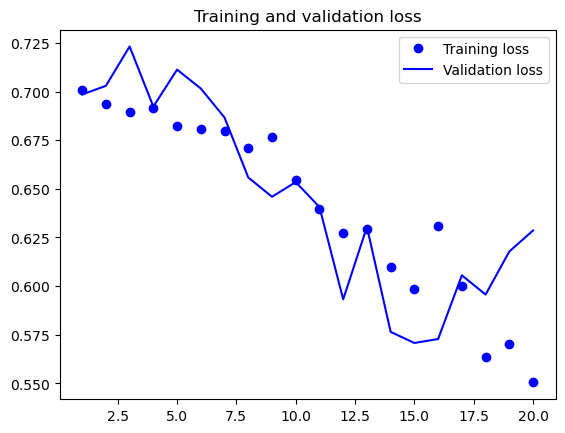

In [11]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_Accuracy.png')

In [12]:
#model.save(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab12\E1-cp-0012-loss0.21.h5')

Found 20 images belonging to 2 classes.
1/1 [==============================] - 1s 570ms/step


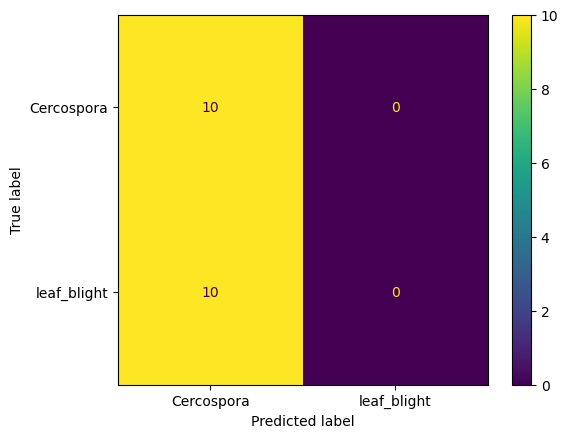

In [13]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, shuffle=False, class_mode='binary')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [14]:
print(classification_report(label, pred, target_names=['Cercospora', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.50      1.00      0.67        10
 leaf_blight       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



C:\Users\AFNAN AHMAD\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AFNAN AHMAD\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AFNAN AHMAD\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le